In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../02 ML pipeline/train.csv')

In [3]:
df.size

10692

In [4]:
x =[]
n = len(df)
numeric = ['1', '2', '3', '4']
categorical = ['A', 'B', 'C', 'D']
for i in range(0, n):
    x.append(str(numeric[np.random.randint(4)] + categorical[np.random.randint(4)]))

df['cab'] = x

## OR
vals = [0, 1, 2, 3, 4, 'A', 'B', 'C', 'D']
df['x'] = np.random.choice(vals, size= len(df))

In [5]:
df = df[['Sex', 'Age', 'Fare', 'x', 'cab']]

<Axes: xlabel='cab'>

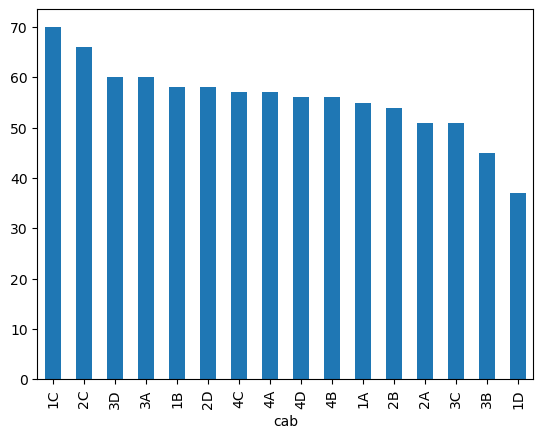

In [6]:
df['cab'].value_counts().plot.bar()

Now we have two kind of mixed variables
1. diff data type in single column - x
2. mix data type value - cab

In [11]:

df['cabin_num'] = df['cab'].str[0] # captures numerical part
df['cabin_cat'] = df['cab'].str[1]               # captures the first letter

In [12]:
df.head()

,Sex,Age,Fare,x,cab,cabin_num,cabin_cat
0,male,22.0,7.2500,2,4D,4,D
1,female,38.0,71.2833,3,2C,2,C
2,female,26.0,7.9250,C,2A,2,A
3,female,35.0,53.1000,D,3D,3,D
4,male,35.0,8.0500,0,3C,3,C


In [17]:
#errors = 'coerse' means when we can't convert any value to numeric than it must be NaN
df['x_num'] = pd.to_numeric(df['x'], errors='coerce', downcast='integer')
df['x_cat'] = np.where(df['x_num'].isnull(), df['x'], np.nan)


In [18]:
df.head()

,Sex,Age,Fare,x,cab,cabin_num,cabin_cat,x_num,x_cat
0,male,22.0,7.2500,2,4D,4,D,2.0,NaN
1,female,38.0,71.2833,3,2C,2,C,3.0,NaN
2,female,26.0,7.9250,C,2A,2,A,NaN,C
3,female,35.0,53.1000,D,3D,3,D,NaN,D
4,male,35.0,8.0500,0,3C,3,C,0.0,NaN
